In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from adjustText import adjust_text

In [2]:
df=pd.read_csv('aviasales.csv')

In [3]:
df.tail()

,flight_id,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,duration,model,earn,hour_consumption,max_bording,cur_pass,perc_bording,profit
113,136887,AAQ,EGO,SU9,2017-01-20 09:30:00.000000,2017-01-20 10:19:00.000000,0.82,Sukhoi Superjet-100,595200,1700,97,78,0.80,539440
114,136620,AAQ,EGO,SU9,2017-02-17 09:30:00.000000,2017-02-17 10:19:00.000000,0.82,Sukhoi Superjet-100,613500,1700,97,79,0.81,557740
115,136861,AAQ,EGO,SU9,2017-02-12 09:28:00.000000,2017-02-12 10:17:00.000000,0.82,Sukhoi Superjet-100,689100,1700,97,87,0.90,633340
116,136654,AAQ,EGO,SU9,2017-01-19 09:28:00.000000,2017-01-19 10:17:00.000000,0.82,Sukhoi Superjet-100,759000,1700,97,96,0.99,703240
117,136642,AAQ,EGO,SU9,2017-01-30 09:28:00.000000,2017-01-30 10:17:00.000000,0.82,Sukhoi Superjet-100,531000,1700,97,64,0.66,475240


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          118 non-null    int64  
 1   departure_airport  118 non-null    object 
 2   arrival_airport    118 non-null    object 
 3   aircraft_code      118 non-null    object 
 4   actual_departure   118 non-null    object 
 5   actual_arrival     118 non-null    object 
 6   duration           118 non-null    float64
 7   model              118 non-null    object 
 8   earn               118 non-null    int64  
 9   hour_consumption   118 non-null    int64  
 10  max_bording        118 non-null    int64  
 11  cur_pass           118 non-null    int64  
 12  perc_bording       118 non-null    float64
 13  profit             118 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 13.0+ KB


In [5]:
df.actual_departure = pd.to_datetime(df['actual_departure'])
df.actual_arrival=pd.to_datetime(df['actual_arrival'])

In [6]:
df.actual_departure.dt.month.value_counts()

1    62
2    56
Name: actual_departure, dtype: int64

In [7]:
df.corr()

,flight_id,duration,earn,hour_consumption,max_bording,cur_pass,perc_bording,profit
flight_id,1.000000,-0.899036,-0.872855,-0.900023,-0.900023,-0.705965,0.357894,-0.866665
duration,-0.899036,1.000000,0.974229,0.999437,0.999437,0.802788,-0.373502,0.967803
earn,-0.872855,0.974229,1.000000,0.976290,0.976290,0.907523,-0.183254,0.999637
hour_consumption,-0.900023,0.999437,0.976290,1.000000,1.000000,0.805490,-0.371362,0.970134
max_bording,-0.900023,0.999437,0.976290,1.000000,1.000000,0.805490,-0.371362,0.970134
cur_pass,-0.705965,0.802788,0.907523,0.805490,0.805490,1.000000,0.244223,0.917019
perc_bording,0.357894,-0.373502,-0.183254,-0.371362,-0.371362,0.244223,1.000000,-0.159653
profit,-0.866665,0.967803,0.999637,0.970134,0.970134,0.917019,-0.159653,1.000000


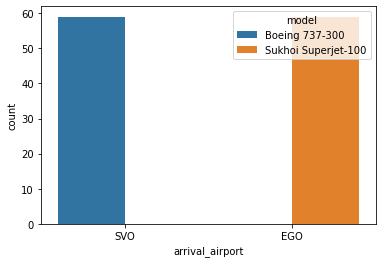

In [12]:
fig = plt.figure()
a=sns.countplot(x=df.arrival_airport, hue=df.model)
fig.savefig('bar1')

In [13]:
df['profit_in_min']=round(df.profit/(df.duration*60))

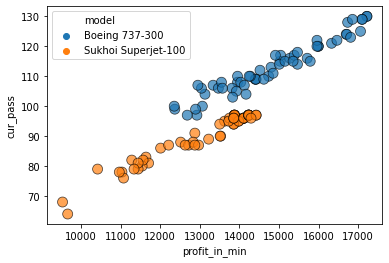

In [19]:

y = df['cur_pass']
z = df['profit_in_min']
n = df['flight_id']
fig, ax=plt.subplots()
p1 = sns.scatterplot(x=z,
                     y=y,
                     data=df,
                     hue='model', s=100,
                     alpha=0.7,
                     edgecolor='k')
fig.savefig('scatter2')

In [15]:
boeing = df[df['model']=='Boeing 737-300']

In [16]:
#Рейсы которые можно поменять на Sukhoi
boeing[boeing['cur_pass']<=97]

,flight_id,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,duration,model,earn,hour_consumption,max_bording,cur_pass,perc_bording,profit,profit_in_min
26,136360,AAQ,SVO,733,2017-02-05 10:08:00,2017-02-05 11:48:00,1.67,Boeing 737-300,1455400,2400,130,97,0.75,1295080,12925.0
33,136122,AAQ,SVO,733,2017-01-08 10:08:00,2017-01-08 11:48:00,1.67,Boeing 737-300,1431000,2400,130,97,0.75,1270680,12681.0


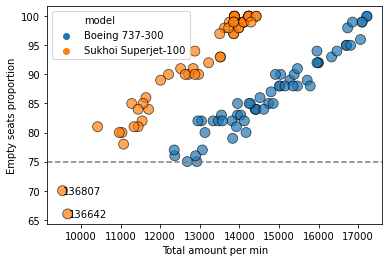

In [18]:
y = df['perc_bording']*100
z = df['profit_in_min']
n = df['flight_id']
fig, ax = plt.subplots()
p1 = sns.scatterplot(x=z,
                     y=y,
                     data=df,
                     hue='model', s=100,
                     alpha=0.7,
                     edgecolor='k')
p1.axhline(75, c=(.5, .5, .5), ls='--')
texts=[]
for i, txt in enumerate(n):
    if y[i]<75:
        texts.append(ax.text(z[i], y[i], txt))
adjust_text(texts,
            ax=ax,
            only_move=dict(points='x', text='x', objects='x'),
            autoalign='x')
p1.set(ylabel='Empty seats proportion', xlabel='Total amount per min')
fig.savefig('scatter')
plt.show()

In [22]:
sukhoi=df[df.model=='Sukhoi Superjet-100']

In [24]:
#рейсы с низкой загруженностью
sukhoi[sukhoi.perc_bording*100<75].append(boeing[boeing['cur_pass']<=97])

,flight_id,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,duration,model,earn,hour_consumption,max_bording,cur_pass,perc_bording,profit,profit_in_min
94,136807,AAQ,EGO,SU9,2017-02-23 09:28:00,2017-02-23 10:18:00,0.83,Sukhoi Superjet-100,531000,1700,97,68,0.70,474560,9529.0
117,136642,AAQ,EGO,SU9,2017-01-30 09:28:00,2017-01-30 10:17:00,0.82,Sukhoi Superjet-100,531000,1700,97,64,0.66,475240,9659.0
26,136360,AAQ,SVO,733,2017-02-05 10:08:00,2017-02-05 11:48:00,1.67,Boeing 737-300,1455400,2400,130,97,0.75,1295080,12925.0
33,136122,AAQ,SVO,733,2017-01-08 10:08:00,2017-01-08 11:48:00,1.67,Boeing 737-300,1431000,2400,130,97,0.75,1270680,12681.0
